# Lab: SVMs
## CMSE 381 - Spring 2022
## April 15, 2022

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time


# ML imports we've used previously
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# For today, we just need SVC
from sklearn.svm import SVC 

We now have discussed three related methods in class. The book's definitions as we talked about in class are:

- *Maximal Margin Classifiers*, where the goal was to find a separating hyperplane with no misclassifications, 
- *Support vector classifiers*, where we allow for a soft margin and hence some misclassifications, but only allow for a linear kernel, and 
- *Support vector machines*, where we have a soft margin and an option for kernels. 

It turns out that `sklearn` has only one function to do all of this. A reminder from last time.  **<font color=red>There are two things that will likely be confusing. </font>**
- The command is just called `SVC`, but you should thinking of it as doing the most general SVM as defined in the book and then we can modify our inputs to allow for the other options as necessary.
- The cost input parameter is not the same as the `C` defined in the book. However, it controls the same thing; that is, the amount of tolerance we have for data points on the wrong side of the margin and/or wrong side of the boundary.

The command below is the same as from the last notebook.  The goal is just to be able to draw the boundaries from the SVM easily. 

In [2]:
# Run this cell to define the function
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xvec = np.arange(x_min, x_max, h)
    yvec = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xvec,yvec )
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by X's
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    
    if svc.kernel == 'linear':
        # Get the margin lines 
        w = svc.coef_[0]
        a = -w[0] / w[1]
        yhyperplane = a * xvec - (svc.intercept_[0]) / w[1]
        margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
        ymargin_down = yhyperplane+  - np.sqrt(1 + a ** 2) * margin
        ymargin_up = yhyperplane + np.sqrt(1 + a ** 2) * margin
        plt.plot(xvec,ymargin_down, "k--")
        plt.plot(xvec,ymargin_up, "k--")

    
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# Swapping out the kernel 

In today's class, we've been discussing changing the kernel function and then learning the model
$$
f(x) = \beta_0 + \sum_{i \in \mathcal{S}}\alpha_i K(x,x_i)
$$

Text(0, 0.5, 'X2')

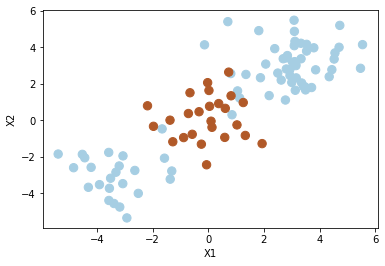

In [3]:
data3 = np.loadtxt('SVM-Data3.csv')
X = data3[:,:2]
y = data3[:,2]


plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

&#9989; **<font color=red>Do this:</font>** Train a SVC using a radial kernel (this is `kernel = 'rbf'` as input to the `SVC` function) and with $C=1$, $\gamma = 1$. Use the `plot_svc` function to see what the learned boundary looks like. 

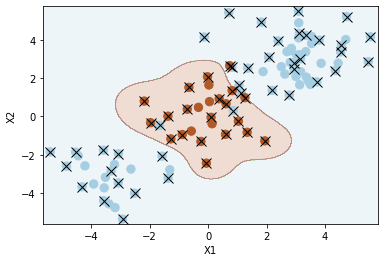

Number of support vectors:  60


In [16]:
# Your code here
svc = SVC(C=1, kernel = "rbf", gamma=1)
svc.fit(X,y)
plot_svc(svc,X,y)

&#9989; **<font color=red>Do this:</font>** What happens if you increase $C$ to 100? Is this model looking better or worse than what you had before?

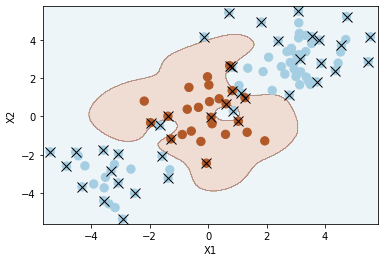

Number of support vectors:  43


In [40]:
# Your code here #
svc = SVC(C=100, kernel = "rbf", gamma=1)
svc.fit(X,y)
plot_svc(svc,X,y)

&#9989; **<font color=red>Do this:</font>** Use the `GridSearchCV` function (see the last lab for examples of using it) to determine the best $C$ and $\gamma$ parameters. Use the `plot_svc` function to take a look at the result.

In [18]:
# Your code here
from sklearn.model_selection import GridSearchCV

In [35]:
C_list = [0.01, 0.1, 1, 10, 100]
gamma_list = [0.5,1,2,3,4]
tuned_parameters = [{'C': C_list, 'gamma': gamma_list}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             scoring='accuracy')

In [38]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

# Still have time? 

Download the NIST data set from here: https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits

You just need two files for now, the training set `optdigits.tra` and the testing set `optdigits.tes`. The following commands will pull the data from the remote server. Optionally, you can download the files directly to your computer.

In [21]:
X_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [22]:
X_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [23]:
# X_train = pd.read_csv('optdigits.tra', header=None) #<-- put this line back in if you saved the data locally
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

# X_test = pd.read_csv('optdigits.tes', header=None) #<-- put this line back in if you saved the data locally
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

In [24]:
print(X_train.shape)
print(X_test.shape)

(3823, 64)
(1797, 64)


This data set consists of 8x8 images of handwritten digits. The following command will draw each data point for you. Mess around with the value of $i$ below to see other examples

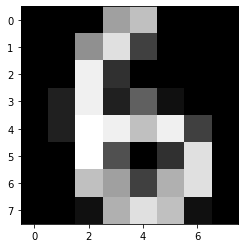

Data point 27 is labeled as 6


In [41]:
i = 27
plt.imshow(X_train.values[i].reshape(8,8), cmap="gray") 
plt.show()
print(f'Data point {i} is labeled as {y_train[i]}')

&#9989; **<font color=red>Do this:</font>** Build a classifier to predict the correct digit for a given handwritten digit. As you do this, answer the following questions:
- What choice of kernel does best? 
- What are the optimal choices of parameters for the SVC? 
- How well does your classifier do? Don't forget that quality measures should always use testing data.

In [42]:
# Your answer here
svc = SVC(kernel = 'linear')
svc(X_train,y_train)

TypeError: 'SVC' object is not callable



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.